In [1]:
from strategy_pool import StrategyPool
from backtest_params_pool import *
from params_gen import *

In [2]:
basic_params = {
'basic':param_basic_2005_2017,
}

fast_params = {
'basic':param_basic_fasttest,
}


In [3]:
import crosssec_param_1
yang_test = crosssec_param_1.gen_param()

In [4]:
fast_test = params_generator(fast_params,weight_method_=['equal'],method_=['e_iskew'],qcut_=[10],rev_backtime_=[30])

GA_POOL = params_generator(yang_test,weight_method_=['equal'],method_=['e_iskew'],qcut_=[10,20],rev_backtime_=[30])

In [5]:
ss = StrategyPool(GA_POOL)

Future Database init...
Time used: 12.431869924804332


In [7]:
ss.save_strategy_pool('..\\save_strategy','new_GA')


Store data...
Stratrgy Pool has been successfully saved to:
D:\!MyQuant\save_strategy

You can load it with load_strategy_pool('D:\!MyQuant\save_strategy')


In [6]:
ss.load_strategy_pool('..\\save_strategy','new_GA')

StrategyPool loaded successfully.


In [8]:
ss.evaluate()

Peformance init...
Peformance init...
Peformance init...
Peformance init...
Peformance init...
Peformance init...
Peformance init...
Peformance init...


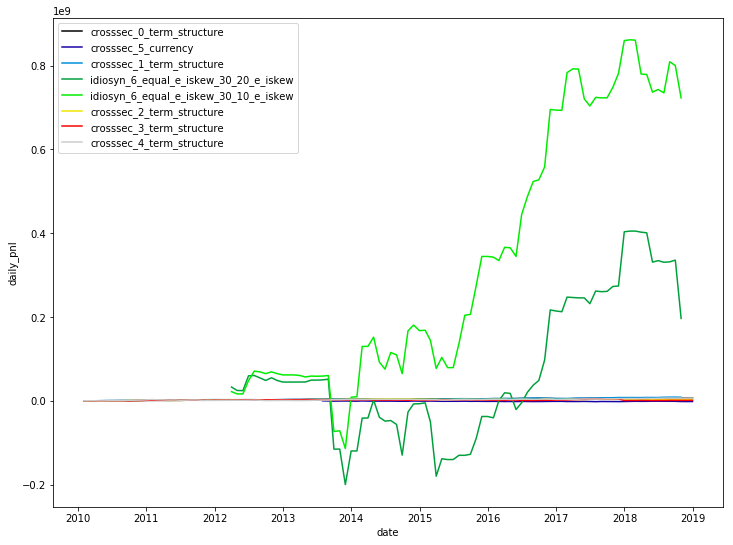

In [9]:
ss.plot()

In [ ]:
from big_event import BigEventAnalyzer

In [11]:
RA = BigEventAnalyzer()
tw_timeline = RA.return_trade_war_timeline()

In [12]:
def nearest(items, pivot):
        return min(items, key=lambda x: abs(x - pivot))

In [25]:
for (testname, method_name) in ss.performance.keys():
            df = ss.performance[(testname, method_name)].performance["daily_pnl"]
            df_date_index = df.index
            event_react_index = []
            for event_ in tw_timeline.index:
                # print(nearest(df_date_index,event_))
                event_react_index.append(nearest(df_date_index,event_))
            event_react_index = list(set(event_react_index))
            event_re = df[event_react_index]

In [26]:
from Paint import plot_risk_analyze

No handles with labels found to put in legend.


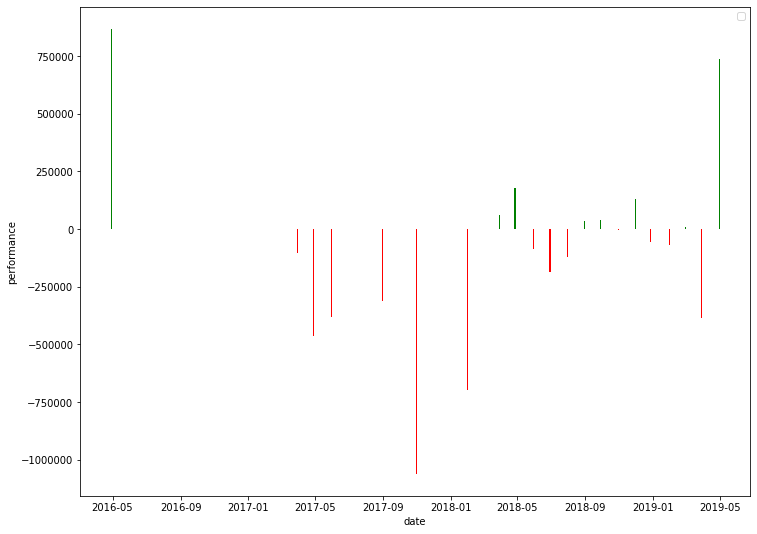

In [15]:
plot_risk_analyze(df,event_re)

In [29]:
print (df)

date
2012-03-30    104662.008477
2012-04-27     92783.350302
2012-05-31    164119.149085
2012-06-29    111968.530756
2012-07-31   -135739.040209
                  ...      
2018-12-28    -57908.158795
2019-01-31    -68634.007718
2019-02-28      7369.523648
2019-03-29   -386573.191240
2019-04-30    734983.686738
Name: period_1, Length: 86, dtype: float64


In [37]:
for event_ in tw_timeline.index:
                # print(nearest(df_date_index,event_))
                tw_timeline.loc[event_,'react']=nearest(df_date_index,event_)
                tw_timeline.loc[event_,'var']=df[nearest(df_date_index,event_)]
                tw_timeline.loc[event_,'var_pct']=df[nearest(df_date_index,event_)]/ss.performance[(testname, method_name)].booksize


In [42]:
print (tw_timeline.dropna()[['var','var_pct','description']])
tw_timeline.dropna()[['var','var_pct','description']].to_csv('xxx.csv')

                      var   var_pct  \
date                                  
2018-07-06 -184685.706865 -0.018469   
2018-07-10 -184685.706865 -0.018469   
2018-08-02 -123011.582343 -0.012301   
2018-08-03 -123011.582343 -0.012301   
2018-08-07 -123011.582343 -0.012301   
...                   ...       ...   
2019-08-13  734983.686738  0.073498   
2019-08-13  734983.686738  0.073498   
2019-08-23  734983.686738  0.073498   
2019-08-25  734983.686738  0.073498   
2019-08-26  734983.686738  0.073498   

                                                  description  
date                                                           
2018-07-06  US: The US Customs and Border Protection (CBP)...  
2018-07-10  US: The USTR releases a third list of tariffs ...  
2018-08-02  The USTR, at the direction of Trump, considers...  
2018-08-03  In response to potential US tariffs on US$200 ...  
2018-08-07  US: US releases a revised version of tariffs o...  
...                                         

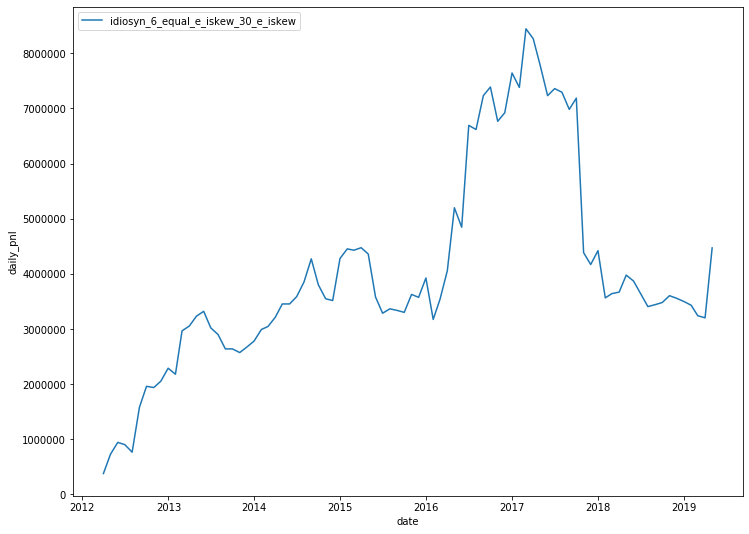

In [7]:
ss.plot() #20re

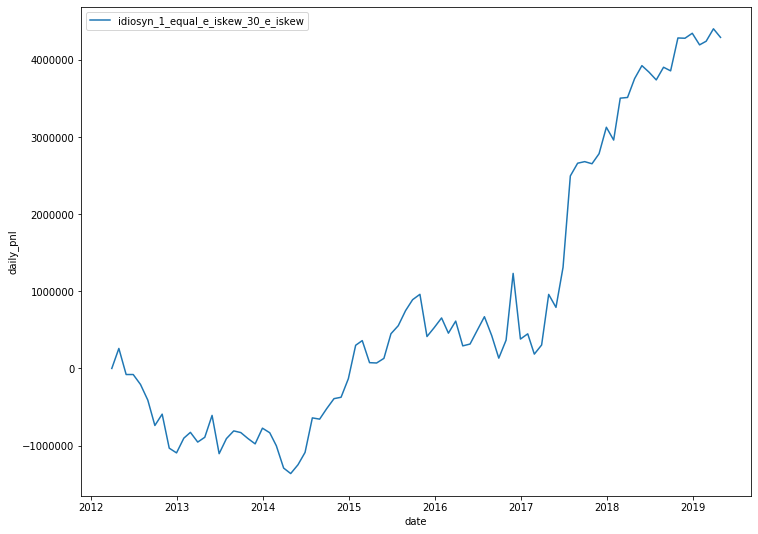

In [60]:
ss.plot() #10

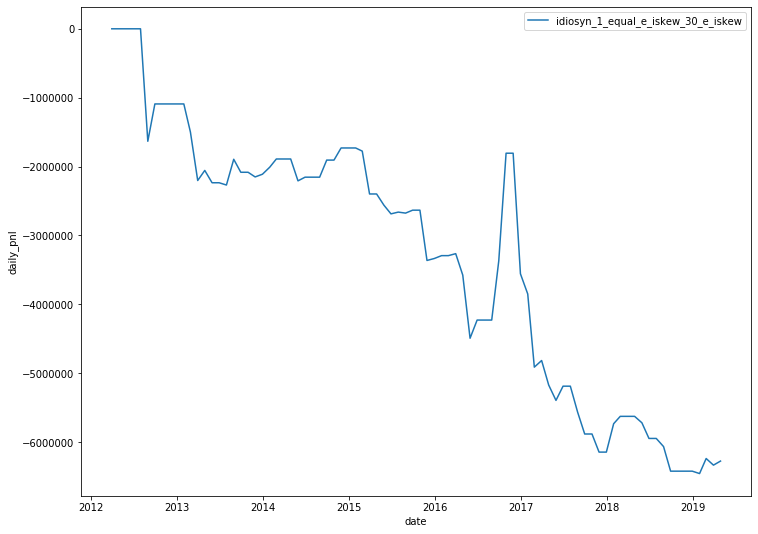

In [53]:
ss.plot() #20

In [72]:
pe = ss.strategy_pool['idiosyn_1_equal_e_iskew_30']
df = pe.data_forward
dxxx = df.copy()
dxxx['e_iskew'] = df.groupby('instrument')['e_iskew'].shift(1)

In [79]:
print(dxxx[['return','period_1','close']].dropna())

                     return  period_1      close
date       code                                 
2012-03-30 a1301   0.027600  0.027600    4529.00
           b1209   0.018256 -0.093103    4930.00
           c1209   0.013158 -0.000822    2432.00
           cf209  -0.004002 -0.006591   21240.00
           er209   0.005259  0.010518    2662.00
           fu1205  0.001625 -0.037906    5540.00
           l1209   0.005181 -0.021196   10615.00
           m1209   0.043157  0.055179    3244.00
           p1209   0.035223  0.023326    8574.00
           pb1206 -0.002569  0.016057   15570.00
           pm301   0.006582  0.000878    2279.00
           rb1210  0.006938 -0.012720    4324.00
           ro209   0.026921  0.052073   10178.00
           sr209   0.005716 -0.013989    6648.00
           ta209  -0.001157 -0.009715    8646.00
           v1209   0.015173  0.010838    6920.00
           ws209   0.006178 -0.028185    2590.00
           wt209  -0.000441 -0.023789    2270.00
           y1209   0

In [71]:
dxxx.dropna()[['instrument','close','period_1','e_iskew']].loc['2017-08-31']

instrument     close  period_1  e_iskew
date       code                                          
2017-08-31 ag1712         ag   3990.00 -0.029073     -1.0
           au1712         au    279.90 -0.003573      1.0
           c1801           c   1687.00  0.003557      1.0
           hc1801         hc   4072.00 -0.023084     -1.0
           i1801           i    573.00 -0.206806     -1.0
           jd1801         jd   4227.00 -0.009936     -1.0
           jm1801         jm   1419.00 -0.201198     -1.0
           ma801          ma   2882.00 -0.056905     -1.0
           rb1801         rb   3927.00 -0.059078     -1.0
           ru1801         ru  16545.00 -0.184346     -1.0
           t1712           t     94.85  0.003585      1.0
           tf1712         tf     97.55  0.001486      1.0

In [27]:
print(ss.performance)

{('idiosyn_1_equal_e_iskew_30', 'e_iskew'): <Performance.Performance object at 0x000001C8AA2C6390>}


In [28]:
perform = ss.performance[('idiosyn_1_equal_e_iskew_30', 'e_iskew')]

In [30]:
print(perform.performance['daily_pnl'])

date
2012-03-30    0.000000e+00
2012-04-27    0.000000e+00
2012-05-31   -3.379806e+05
2012-06-29    0.000000e+00
2012-07-31    0.000000e+00
2012-08-31   -1.633318e+06
2012-09-28    5.421687e+05
2012-11-30    0.000000e+00
2012-12-31   -2.197393e+05
2013-02-28   -5.768033e+04
2013-03-29   -7.769828e+05
2013-04-26    1.766696e+05
2013-05-31   -8.382122e+04
2013-06-28   -3.933316e+05
2013-07-31   -3.293085e+04
2013-08-30    3.292947e+05
2013-09-30   -1.237594e+05
2013-11-29   -6.776789e+04
2013-12-31    5.150061e+05
2014-01-30   -1.673195e+05
2014-02-28   -1.157099e+05
2014-03-31   -3.197784e+05
2014-04-30   -1.678418e+05
2014-05-30   -1.082799e+05
2014-06-30    9.562999e+04
                  ...     
2017-01-26   -1.462604e+05
2017-02-28   -5.506144e+05
2017-03-31   -3.453829e+04
2017-04-28    9.400294e+05
2017-05-31    2.530210e+05
2017-06-30    5.157731e+05
2017-07-31   -3.297020e+06
2017-08-31   -3.131851e+04
2017-09-29    1.796303e+04
2017-10-31    2.619288e+05
2017-11-30    1.299486e

In [85]:
x = np.array([ 0.00898751,  0.00277741 , 0.00240472  ,0.00442558, -0.00253745  ,0.00587078,
 -0.01011687, -0.00523273 , 0.0069173 , -0.01784069 ,-0.00028252 , 0.00606114,
 -0.01357319 , 0.00112308,  0.00676733 ,-0.00065251,  0.00835598 , 0.002469,
  0.00087662 , 0.00477703 , 0.00011339 ,-0.01169])

In [9]:
x = [1,2,3,4,5,5]

In [10]:
print(set(x))

{1, 2, 3, 4, 5}


In [91]:
name_ = ['ic', 'ma', 'rb', 'y', 'if', 'zc', 'l', 'bu', 'ap', 'm', 'c', 'ag', 'jm', 'jd', 'hc', 'ni', 'j', 'wh', 'cu', 'au', 't', 'cf', 'oi', 'sf', 'al', 'ta', 'rm', 'sn', 'v', 'sr', 'i', 'ru', 'p', 'fg', 'ih', 'zn', 'a', 'tf', 'b', 'sm', 'pb', 'cs', 'pp']